In [3]:
import numpy as np 
import pandas as pd

In [4]:
data=pd.read_csv('winequality-red.csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#can do if required for this dataset
# Function for data preprocessing
def preprocess_data(data, target_column):
    # Separating features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    print(X)
    print(y)
    # Handling missing values
    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    
    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)
    
    return X_train_preprocessed, X_test_preprocessed, y_train, y_test


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(data, target_column):
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int', 'float']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='mean')

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Preprocessing of features
    X_preprocessed = preprocess_pipeline.fit_transform(X)

    return X_preprocessed, y

# Assuming you have a 'data' DataFrame and a target column named 'quality'
X_preprocessed, y = preprocess_data(data, target_column="quality")


In [21]:
from sklearn.model_selection import train_test_split

# Preprocess the data
X_preprocessed, y = preprocess_data(data, target_column="quality")

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [22]:
# Function for building the decision tree classifier
def build_decision_tree(X_train, y_train, max_depth=None):
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    return(classifier)

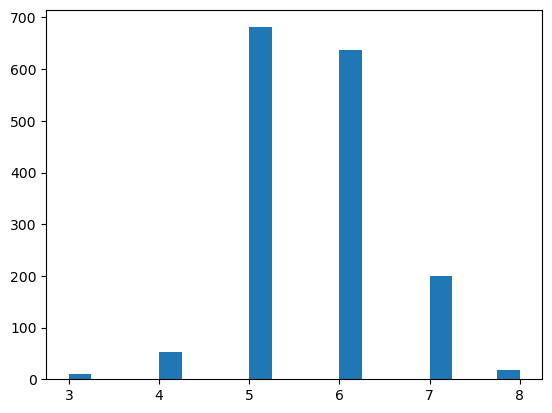

In [23]:

import matplotlib.pyplot as plt



target_column = data["quality"]
plt.hist(target_column, bins=20)
plt.show()


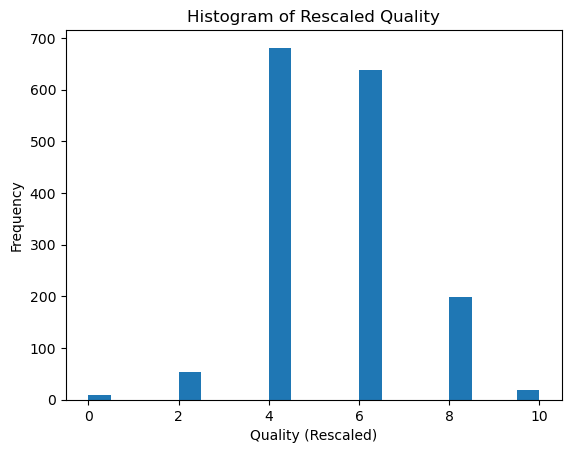

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Rescale 'quality' column to a specific range, for example (0, 10)
scaler = MinMaxScaler(feature_range=(0, 10))
data['quality_rescaled'] = scaler.fit_transform(data['quality'].values.reshape(-1, 1))
plt.hist(data['quality_rescaled'], bins=20)
plt.xlabel('Quality (Rescaled)')
plt.ylabel('Frequency')
plt.title('Histogram of Rescaled Quality')
plt.show()


In [26]:
from sklearn.tree import DecisionTreeClassifier

def build_decision_tree(X_train, y_train, max_depth=None):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(X_train, y_train)
    return classifier

# Assuming X_train and y_train are already defined
classifier = build_decision_tree(X_train, y_train)


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
    disp.plot()
    plt.plot()
    return accuracy, report, confusion_mat




(0.56875,
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        10\n           5       0.65      0.68      0.66       130\n           6       0.56      0.54      0.55       132\n           7       0.53      0.55      0.54        42\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.57       320\n   macro avg       0.29      0.29      0.29       320\nweighted avg       0.57      0.57      0.57       320\n',
 array([[ 0,  0,  0,  1,  0,  0],
        [ 0,  0,  5,  5,  0,  0],
        [ 1,  7, 88, 32,  2,  0],
        [ 0,  3, 40, 71, 16,  2],
        [ 0,  1,  2, 15, 23,  1],
        [ 0,  0,  1,  2,  2,  0]], dtype=int64))

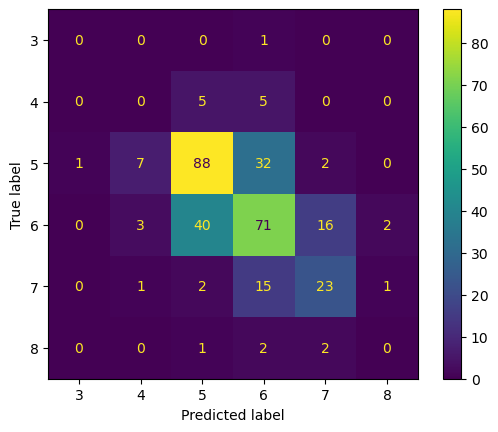

In [40]:
evaluate_model(classifier, X_test, y_test)

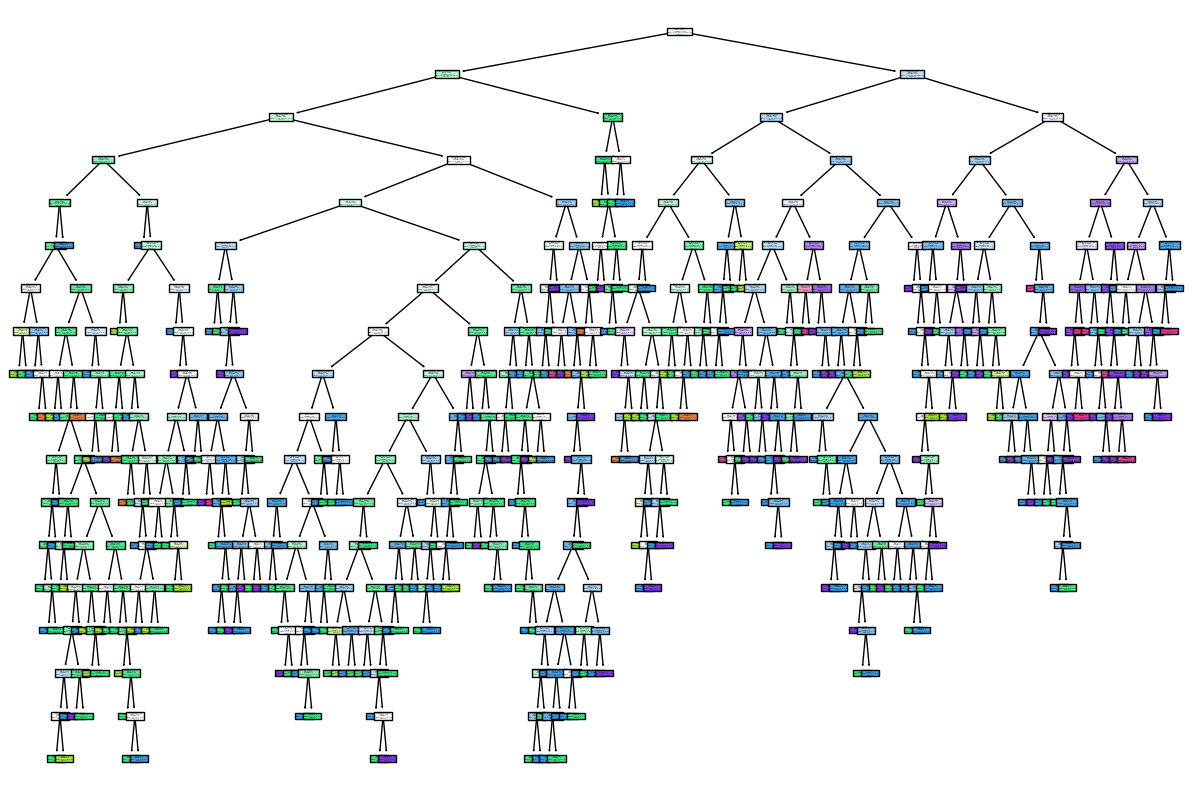

In [53]:
from sklearn.tree import plot_tree

def visualize_tree(classifier, feature_names):
    plt.figure(figsize=(15, 10))
    class_names = [str(label) for label in classifier.classes_]
    plot_tree(classifier, feature_names=feature_names.tolist(), class_names=class_names, filled=True)
    plt.show()

visualize_tree(classifier, data.columns[:-1])


In [63]:
print(X_test)

[[ 7.7    0.56   0.08  ...  3.24   0.66   9.6  ]
 [ 7.8    0.5    0.17  ...  3.39   0.48   9.5  ]
 [10.7    0.67   0.22  ...  3.28   0.98   9.9  ]
 ...
 [ 8.3    0.6    0.25  ...  3.15   0.53   9.8  ]
 [ 8.8    0.27   0.39  ...  3.15   0.69  11.2  ]
 [ 9.1    0.765  0.04  ...  3.29   0.54   9.7  ]]


In [64]:
x = data.iloc[:, :-1]
y=data['quality']
x
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
parameters={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
    
}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
cl=DecisionTreeClassifier(max_depth=2)
cv=GridSearchCV(cl,param_grid=parameters,cv=5,scoring='accuracy')

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(max_features=None)  

# Perform cross_validation
scores = cross_val_score(classifier, x_train, y_train, cv=5)

# Checking the accuracy scores
print(scores)


[0.625      0.58333333 0.62916667 0.55416667 0.61506276]
